This notebook reproduces plots in Figures 1, S1, and S2.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import glob
import pandas as pd
import pandas as pd
import h5py

Figure 1D

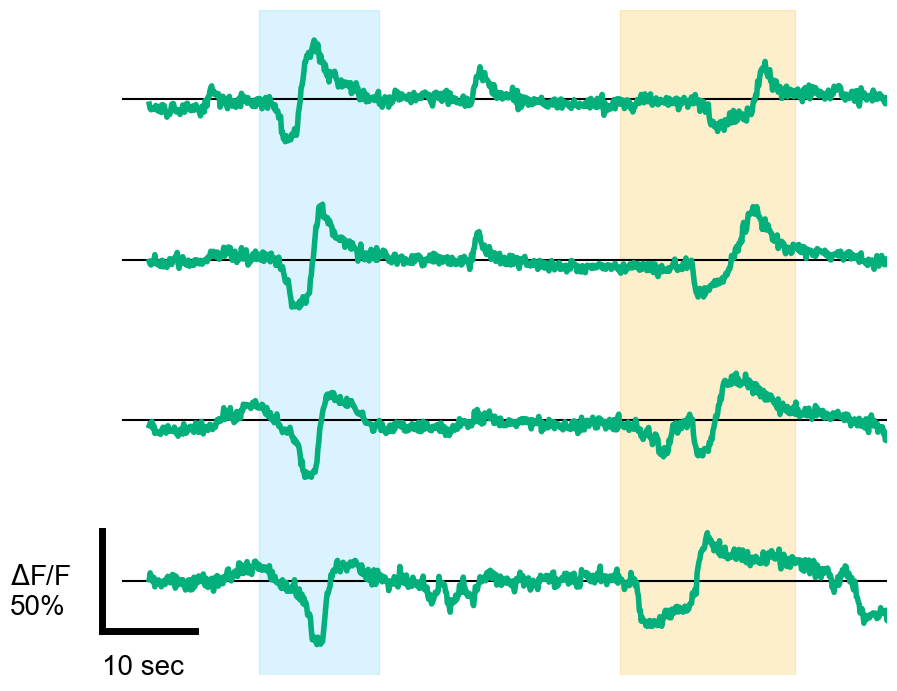

In [2]:
#load fluorescence trace data (time stamps, average fluorescence values of A02l neurons)
traces=pd.read_csv('../data/Fig1_S1_S2/Fig1E_data/202111010_R13B07_Gal4_GCaMP_sample2_traces.csv')
dt_frame=traces['time'][1]-traces['time'][0] #time interval between frames

# define lowpass filter functions
def butter_lowpass(lowcut, fs, order=4):
    '''butterworth power pass filter
    '''
    nyq = 0.5 * fs
    low = lowcut / nyq
    b, a = scipy.signal.butter(order, low, btype='low')
    return b, a
def butter_lowpass_filter(x, lowcut, fs, order=4):
    '''lowpass_filter
    '''
    b, a = butter_lowpass(lowcut, fs, order=order)
    y = scipy.signal.filtfilt(b, a, x,  padtype='even', padlen=int(10.0/dt_frame))
    return y
def dF_F_lowpass_base(F, dt):
    lowpass_base=butter_lowpass_filter(F, 0.01, 1.0/dt) #only use signals slower than 0.01 Hz
    return (F-lowpass_base)/lowpass_base

#calculate dF/F with lowpass baseline
dF_F={}
for key in traces.keys():
    dF_F[key]=dF_F_lowpass_base(traces[key], dt_frame)
dF_F['time'] = traces['time']

#plot dF/F traces of A02l neurons in A4-7 segments (Figure 1D)
fig = plt.figure(figsize=(9,7)); ax = fig.add_subplot(111);
plt.rcParams["font.family"] = "Arial"
plt.axvspan(32,45, color=(77/255,196/255,255/255), alpha=0.2)
plt.axvspan(71,90, color=(246/255,170/255,0/255), alpha=0.2)  
step=0.8
for i in range(4):
    plt.axhline(y=step*i, xmin=0.08, xmax=1,color='k', linestyle='-', lw=1.5)
for i in range(7):
    key='A02l_A'+str(i+1)+'R'
    if key in dF_F.keys():
        plt.plot(dF_F['time'][dF_F['time']>20],dF_F[key][dF_F['time']>20]+step*(6-i),label=key, c=(3/255,175/255,122/255), lw=4)
plt.xlim(10,100)
ax.axis("off")
ax.plot([15,15,15,15], [-0.25,-0.25,0.25,0.25], lw=5, c='k')
ax.plot([15,15,25,25], [-0.25,-0.25,-0.25,-0.25], lw=5, c='k')
ax.text(5,-0.2, "$\Delta$F/F \n50%", ha='left', va='bottom', c='k', fontsize=20)
ax.text(15,-0.5, "10 sec", ha='left', va='bottom', rotation='horizontal', c='k', fontsize=20)
plt.tight_layout()
plt.savefig('./figures/Fig1D.svg')

Figure S1F

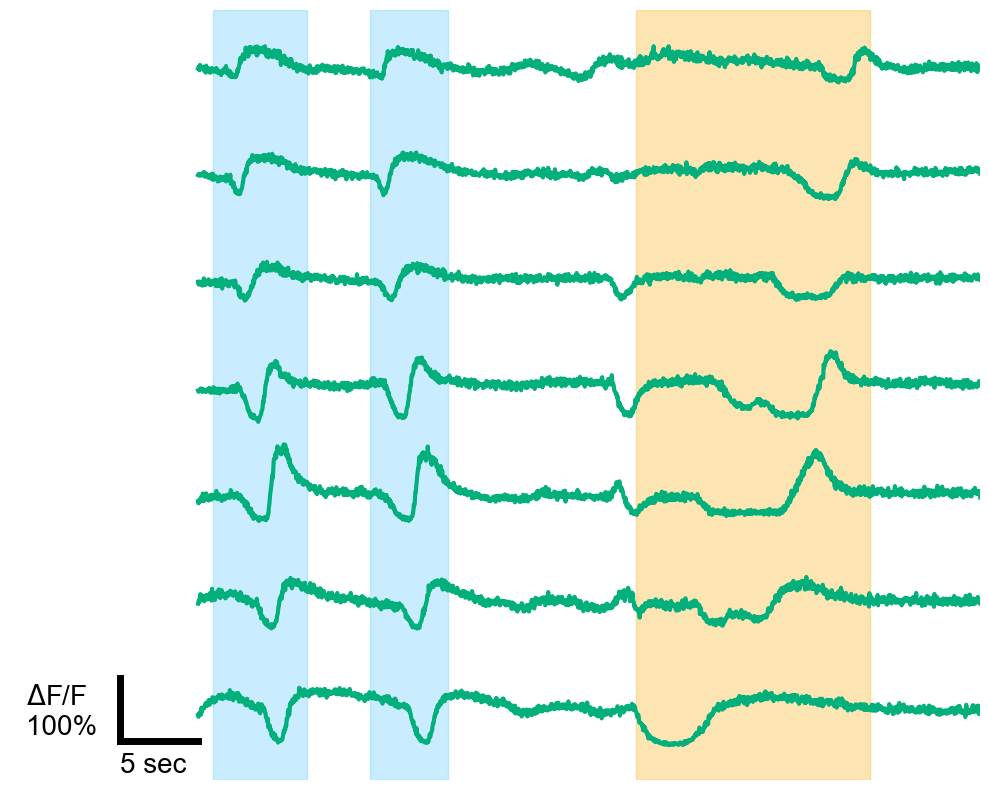

In [3]:
#load fluorescence trace data (time stamps, average fluorescence values of A02l neurons)
traces=pd.read_csv('../data/Fig1_S1_S2/FigS1F_data/240828_A02l_split1_sample2_traces.csv')
dt_frame=traces['time'][1]-traces['time'][0] #time interval between frames

# define lowpass filter functions
def butter_lowpass(lowcut, fs, order=4):
    '''butterworth power pass filter
    '''
    nyq = 0.5 * fs
    low = lowcut / nyq
    b, a = scipy.signal.butter(order, low, btype='low')
    return b, a

def butter_lowpass_filter(x, lowcut, fs, order=4):
    '''lowpass_filter
    '''
    b, a = butter_lowpass(lowcut, fs, order=order)
    y = scipy.signal.filtfilt(b, a, x)
    return y

def dF_F_lowpass_base(F, dt):
    lowpass_base=butter_lowpass_filter(F, 0.02, 1.0/dt) #only use signals slower than 0.02 Hz (~50 sec transients)
    return (F-lowpass_base)/lowpass_base

#calculate dF/F with lowpass baseline
# compute dF/F
dF_F={}
for key in traces.keys():
    dF_F[key]=dF_F_lowpass_base(traces[key], dt_frame)
dF_F['time'] = traces['time']

#plot dF/F traces of A02l neurons in A1-7 segments (Figure S1F)
fig = plt.figure(figsize=(10,8)); ax = fig.add_subplot(111);
plt.rcParams['font.family']='Arial'
plt.axvspan(101,107,color=(77/255,196/255,255/255), alpha=0.3)
plt.axvspan(111,116,color=(77/255,196/255,255/255), alpha=0.3)
plt.axvspan(128,143,color=(246/255,170/255,0/255), alpha=0.3)
step=1.7
for i in range(7):
    key='A02l_A'+str(i+1)+'R'
    plt.plot(dF_F['time'][dF_F['time']>100],dF_F[key][dF_F['time']>100]+step*(6-i),label=key, c=(3/255,175/255,122/255), lw=3)
plt.xlim(88, 150)
ax.axis("off")
ax.plot([95,95,95,95], [-0.5,-0.5,0.5,0.5], lw=5, c='k')
ax.plot([95,95,100,100], [-0.5,-0.5,-0.5,-0.5], lw=5, c='k')
ax.text(89,-0.5, "$\Delta$F/F\n100%", ha='left', va='bottom', c='k', fontsize=20)
ax.text(95,-1.1, "5 sec", ha='left', va='bottom', c='k', fontsize=20)
plt.tight_layout()
plt.savefig('./figures/FigS1F.svg')

Figures 1J, 1K, S2A, S2B

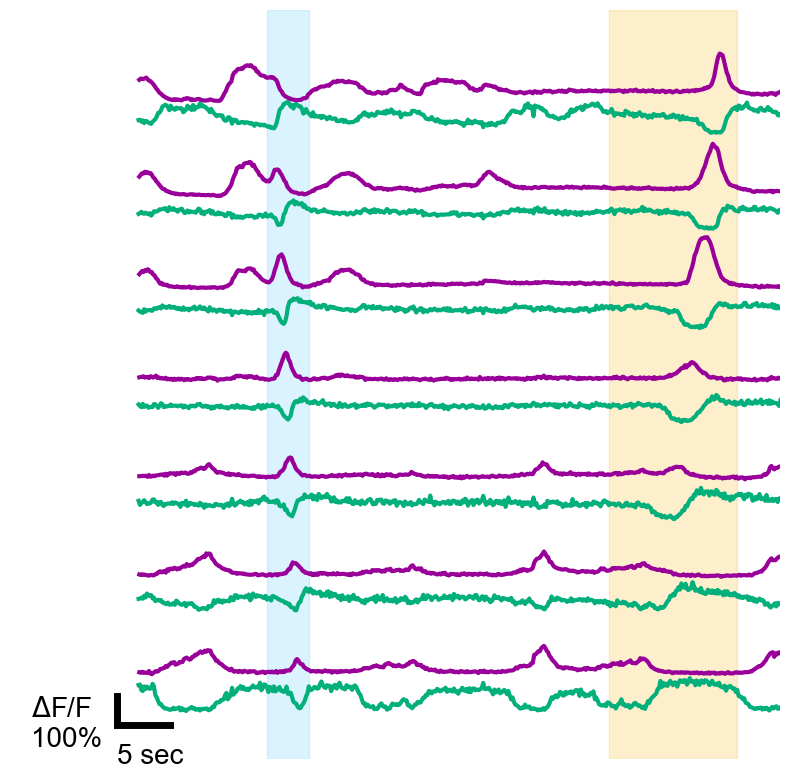

In [4]:
#Fig S2A
# loade fluorescence trace data (time stamps, average fluorescence values of A02l and MN neurons)
dF_F=pd.read_csv('../data/Fig1_S1_S2/FigS2A_data/240903_A02l_eve_dF_F.csv')

fig = plt.figure(figsize=(8,8)); ax = fig.add_subplot(111);
plt.rcParams["font.family"] = "Arial"
plt.axvspan(142,146, color=(77/255,196/255,255/255), alpha=0.2)
plt.axvspan(174,186,color=(246/255,170/255,0/255), alpha=0.2)
step=3.4
for i in range(7):
    key='A02l_A'+str(i+1)+'L'
    plt.plot(dF_F['time_A02l'][dF_F['time_A02l']>130],dF_F[key][dF_F['time_A02l']>130]+step*(6-i),label=key, c=(3/255,175/255,122/255), lw=3)
    key='MN_A'+str(i+1)+'L'
    plt.plot(dF_F['time_MN'][dF_F['time_MN']>130],dF_F[key][dF_F['time_MN']>130]+1+step*(6-i),label=key, c=(153/255,0, 153/255), lw=3)
plt.ylabel('dF/F', fontsize=16)
plt.xlabel('time [s]')
plt.xlim(59*2,95*2)
ax.axis("off")
ax.plot([128,128,128,128], [-1,-1,0,0], lw=5, c='k')
ax.plot([128,128,133,133], [-1,-1,-1,-1], lw=5, c='k')
ax.text(120,-2, "$\Delta$F/F \n100%", ha='left', va='bottom', c='k', fontsize=20)
ax.text(128,-2.6, "5 sec", ha='left', va='bottom', rotation='horizontal', c='k', fontsize=20)

#plt.xlim(0,70)
plt.tight_layout()
plt.savefig('figures/FigS2A.svg')

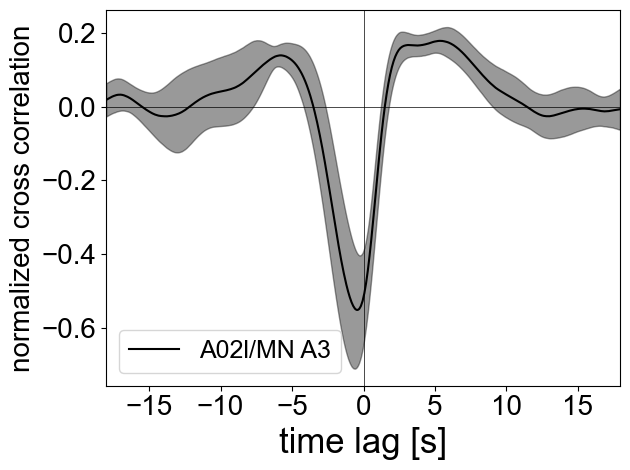

In [5]:
#Fig S2B
#load cross-correlation data of A02l and MN neurons in A3 segment
files = glob.glob('../data/Fig1_S1_S2/FigS2B_data/*.h5')
#interlolating traces
ip1 = scipy.interpolate.interp1d
dt=0.06
time=np.arange(-300,300)*dt
correlation_traces=[]
for file in files:
    data=h5py.File(file, 'r')
    for i in range(len(data['correlation_traces'])):
        fitted_correlation_curve = ip1(data['lag'][0], data['correlation_traces'][i]) #lienarly interpolate the traces
        correlation_traces.append(fitted_correlation_curve(time))               
    data.close()
correlation_traces=np.array(correlation_traces)
#plot mean traces
plt.rcParams["font.family"] = "Arial"
plt.plot(time, correlation_traces.mean(axis=0), c='k', label='A02l/MN A3')
plt.fill_between(time, correlation_traces.mean(axis=0)+np.std(correlation_traces, axis=0), 
                 correlation_traces.mean(axis=0)-np.std(correlation_traces, axis=0), color='k', alpha=0.4)
plt.axhline(0, c='k', lw=0.5)
plt.axvline(0, c='k', lw=0.5)
plt.xlim(time[0],time[-1])

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('time lag [s]',fontsize=25)
plt.ylabel('normalized cross correlation', fontsize=20)
plt.tight_layout()
plt.legend(fontsize=18)
plt.savefig('figures/FigS2B.svg')


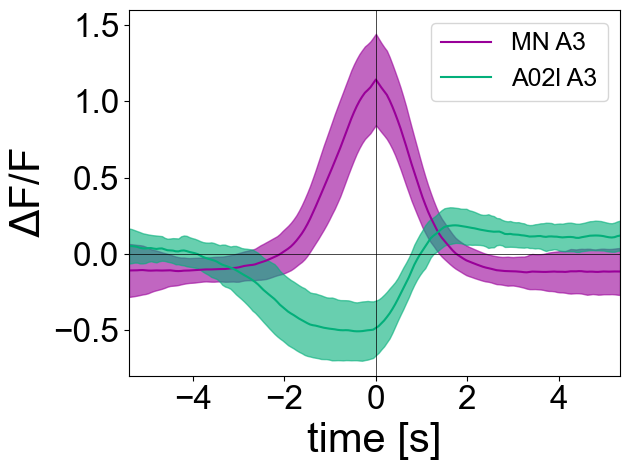

In [6]:
#Fig 1J
# loadding waveform data of A02l and MN neurons in A3 segment in forward waves
files = glob.glob('../data/Fig1_S1_S2/Fig1J_data/*.h5')
#interlolating traces
ip1 = scipy.interpolate.interp1d
dt=0.06
time=np.arange(-90,90)*dt
A02l_traces=[]
MN_traces=[]
for file in files:
    data=h5py.File(file, 'r')
    for i in range(len(data['time'])):
        fitted_A02l_curve = ip1(data['time'][i]+0.5*(data['time'][i][1]-data['time'][i][0]), data['A02l'][i]) #lienarly interpolate the traces
        fitted_MN_curve= ip1(data['time'][i], data['MN'][i])
        A02l_traces.append(fitted_A02l_curve(time))
        MN_traces.append(fitted_MN_curve(time))                
    data.close()
A02l_traces=np.array(A02l_traces)
MN_traces=np.array(MN_traces)
#plot mean traces
plt.rcParams["font.family"] = "Arial"
plt.plot(time, MN_traces.mean(axis=0), c=(153/255,0,153/255), label='MN A3')
plt.fill_between(time, MN_traces.mean(axis=0)+np.std(MN_traces, axis=0), 
                 MN_traces.mean(axis=0)-np.std(MN_traces, axis=0), color=(153/255,0,153/255), alpha=0.6)
plt.plot(time, A02l_traces.mean(axis=0), c=(3/255,175/255,122/255), label='A02l A3')
plt.fill_between(time, A02l_traces.mean(axis=0)+np.std(A02l_traces, axis=0), 
                 A02l_traces.mean(axis=0)-np.std(A02l_traces, axis=0), color=(3/255,175/255,122/255), alpha=0.6)
plt.axhline(0, c='k', lw=0.5)
plt.axvline(0, c='k', lw=0.5)
plt.xlim(time[0],time[-1])
plt.ylim(-0.8,1.6)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xlabel('time [s]',fontsize=30)
plt.ylabel(r'$\Delta$F/F', fontsize=30)
plt.tight_layout()
plt.legend(fontsize=18)
plt.savefig('figures/Fig1J.svg')

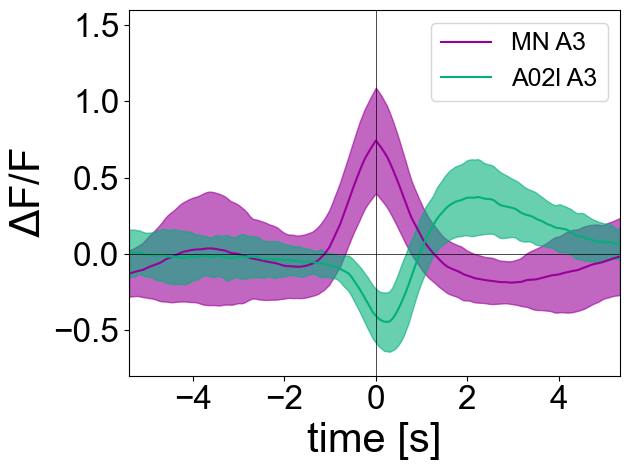

In [7]:
#Fig 1K
# loadding waveform data of A02l and MN neurons in A3 segment in bakcward waves
files = glob.glob('../data/Fig1_S1_S2/Fig1K_data/*.h5')
#interlolating traces
ip1 = scipy.interpolate.interp1d
dt=0.06
time=np.arange(-90,90)*dt
A02l_traces=[]
MN_traces=[]
for file in files:
    data=h5py.File(file, 'r')
    for i in range(len(data['time'])):
        fitted_A02l_curve = ip1(data['time'][i]+0.5*(data['time'][i][1]-data['time'][i][0]), data['A02l'][i]) #lienarly interpolate the traces
        fitted_MN_curve= ip1(data['time'][i], data['MN'][i])
        A02l_traces.append(fitted_A02l_curve(time))
        MN_traces.append(fitted_MN_curve(time))                
    data.close()
A02l_traces=np.array(A02l_traces)
MN_traces=np.array(MN_traces)

#plot average traces
plt.rcParams["font.family"] = "Arial"
plt.plot(time, MN_traces.mean(axis=0), c=(153/255,0,153/255), label='MN A3')
plt.fill_between(time, MN_traces.mean(axis=0)+np.std(MN_traces, axis=0), 
                 MN_traces.mean(axis=0)-np.std(MN_traces, axis=0), color=(153/255,0,153/255), alpha=0.6)
plt.plot(time, A02l_traces.mean(axis=0), c=(3/255,175/255,122/255), label='A02l A3')
plt.fill_between(time, A02l_traces.mean(axis=0)+np.std(A02l_traces, axis=0), 
                 A02l_traces.mean(axis=0)-np.std(A02l_traces, axis=0), color=(3/255,175/255,122/255), alpha=0.6)
plt.axhline(0, c='k', lw=0.5)
plt.axvline(0, c='k', lw=0.5)
plt.xlim(time[0],time[-1])
plt.ylim(-0.8,1.6)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xlabel('time [s]',fontsize=30)
plt.ylabel(r'$\Delta$F/F', fontsize=30)
plt.tight_layout()
plt.legend(fontsize=18)
plt.savefig('figures/Fig1J.svg')

In [8]:
#comparison of rebound amplitudes in the manuscript
# forward wave
files = glob.glob('../data/Fig1_S1_S2/Fig1J_data/*.h5')
A02l_max_t_0_4_fwd=[]
for file in files:
    data=h5py.File(file, 'r')
    for i in range(len(data['time'])):
        #extract rebound amplitude as the maximum dF/F in t=0-4 sec
        A02l_max_t_0_4_fwd.append(data['A02l'][i][(data['time'][i]>0) & (data['time'][i]<4)].max()) 
    data.close()
A02l_max_t_0_4_fwd=np.array(A02l_max_t_0_4_fwd)

#backward wave
files = glob.glob('../data/Fig1_S1_S2/Fig1K_data/*.h5')
A02l_max_t_0_4_bwd=[]
for file in files:
    data=h5py.File(file, 'r')
    for i in range(len(data['time'])):
        #extract rebound amplitude as the maximum dF/F in t=0-4 sec
        A02l_max_t_0_4_bwd.append(data['A02l'][i][(data['time'][i]>0) & (data['time'][i]<4)].max())
    data.close()
A02l_max_t_0_4_bwd=np.array(A02l_max_t_0_4_bwd)
s,p=scipy.stats.mannwhitneyu(A02l_max_t_0_4_fwd,A02l_max_t_0_4_bwd)
print(f'forward wave rebound amplitude: {A02l_max_t_0_4_fwd.mean()} ± {A02l_max_t_0_4_fwd.std()}')
print(f'backward wave rebound amplitude: {A02l_max_t_0_4_bwd.mean()} ± {A02l_max_t_0_4_bwd.std()}')
print(f'p-value: {p}')


forward wave rebound amplitude: 0.2728144150899217 ± 0.11005343284676954
backward wave rebound amplitude: 0.4708915744013073 ± 0.23752226949711644
p-value: 1.1211185159004062e-09


Figures 1M-O, S1D, S1F

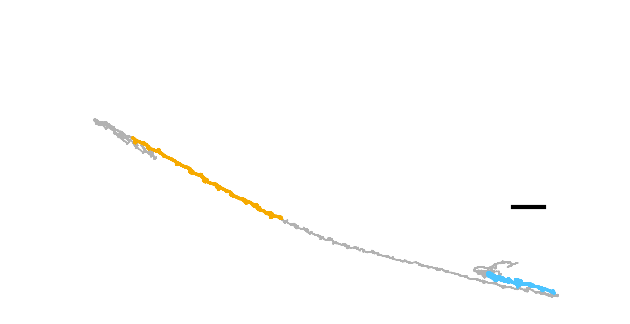

In [9]:
#Fig 1M
#loading data
neuron1_data=pd.read_csv('../data/Fig1_S1_S2/Fig1M_O_data/2024021181850_neuron_1.csv')
neuron2_data=pd.read_csv('../data/Fig1_S1_S2/Fig1M_O_data/2024021181850_neuron_2.csv')
#neuron trajectory plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, aspect="equal")
plt.plot(neuron1_data['x'][(neuron1_data['time (s)']<4300)], neuron1_data['y'][(neuron1_data['time (s)']<4300)],c='k',alpha=0.3,lw=1)
plt.plot(neuron1_data['x'][(3809<neuron1_data['time (s)']) & (neuron1_data['time (s)']<3912)], 
         neuron1_data['y'][(3809<neuron1_data['time (s)']) & (neuron1_data['time (s)']<3912)], c=(246/255,170/255,0/255), lw=2)
plt.plot(neuron1_data['x'][(4100<neuron1_data['time (s)']) & (neuron1_data['time (s)']<4200)], 
         neuron1_data['y'][(4100<neuron1_data['time (s)']) & (neuron1_data['time (s)']<4200)], c=(77/255,196/255,255/255), lw=2)
plt.xlim(-1000,3000)
plt.ylim(-1000,1000)
plt.plot([2300,2300,2500,2500],[-300,-300,-300,-300], c='k', lw=3)
ax.axis("off")
plt.tight_layout()
plt.savefig('figures/Fig1M.svg')


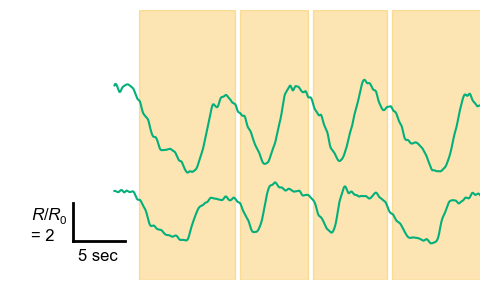

In [10]:
#Fig 1N
#loading data
neuron1_data=pd.read_csv('../data/Fig1_S1_S2/Fig1M_O_data/2024021181850_neuron_1.csv')
neuron2_data=pd.read_csv('../data/Fig1_S1_S2/Fig1M_O_data/2024021181850_neuron_2.csv')
#the time stamp at the start of forward crawling
plot_initial_time=neuron1_data['time (s)'][0]+165  #secq
#load forward crawling periods
forward_timings=pd.read_excel('../data/Fig1_S1_S2/Fig1M_O_data/forward_crawl_init_end.xlsx')
#forwad crawling plot
fig = plt.figure(figsize=(5,3))
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Arial'
plt.rcParams['mathtext.it'] = 'Arial:italic'
plt.rcParams['font.family'] = 'Arial'
ax = fig.add_subplot(1, 1, 1)

plt.plot(neuron1_data['time (s)'][neuron1_data['time (s)']>plot_initial_time]-plot_initial_time, 
         neuron1_data['ratio_div_baseline'][neuron1_data['time (s)']>plot_initial_time], label='neuron 1',c=(3/255,175/255,122/255))
plt.plot(neuron2_data['time (s)'][neuron2_data['time (s)']>plot_initial_time]-plot_initial_time, 
         neuron2_data['ratio_div_baseline'][neuron2_data['time (s)']>plot_initial_time]+4, label='neuron 2', c=(3/255,175/255,122/255))
plt.xlim(-10,35)
plt.ylim(0,14)
for crawl_id in range(4):
    plt.axvspan(forward_timings['initial'][crawl_id]+neuron1_data['time (s)'][0]-plot_initial_time, 
                forward_timings['end'][crawl_id]+neuron1_data['time (s)'][0]-plot_initial_time, color=(246/255,170/255,0/255), alpha=0.3)

plt.xlabel('time (sec)', fontsize=14)
plt.ylabel('$\Delta R/R$', fontsize=14)

plt.plot([-4,-4,1,1],[2,2,2,2], c='k', lw=2)
plt.plot([-4,-4,-4,-4],[2,2,4,4], c='k', lw=2)
plt.text(-3.5, 1, '5 sec', fontsize=12)
plt.text(-8, 2, '$R/R_{0}$\n= 2', fontsize=12)
ax.axis("off")
plt.tight_layout()
plt.savefig('figures/Fig1N.svg')

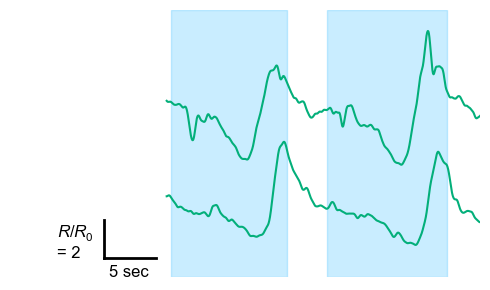

In [11]:
##Fig 1O
#loading data
neuron1_data=pd.read_csv('../data/Fig1_S1_S2/Fig1M_O_data/2024021181850_neuron_1.csv')
neuron2_data=pd.read_csv('../data/Fig1_S1_S2/Fig1M_O_data/2024021181850_neuron_2.csv')
#the time stamp at the start of backward crawling
plot_initial_time=453.5+neuron1_data['time (s)'][0]  #sec
#load backward crawling periods
backward_timings=pd.read_excel('../data/Fig1_S1_S2/Fig1M_O_data/backward_crawl_init_end.xlsx')

#backward crawling plot
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(1, 1, 1)

plt.plot(neuron1_data['time (s)'][neuron1_data['time (s)']>plot_initial_time]-plot_initial_time, 
         neuron1_data['ratio_div_baseline'][neuron1_data['time (s)']>plot_initial_time], label='neuron 1',c=(3/255,175/255,122/255))
plt.plot(neuron2_data['time (s)'][neuron2_data['time (s)']>plot_initial_time]-plot_initial_time, 
         neuron2_data['ratio_div_baseline'][neuron2_data['time (s)']>plot_initial_time]+4, label='neuron 2', c=(3/255,175/255,122/255))
plt.xlim(-15,30)
plt.ylim(0,14)
for crawl_id in range(3):
    plt.axvspan(backward_timings['initial'][crawl_id]+neuron1_data['time (s)'][0]-plot_initial_time, 
                backward_timings['end'][crawl_id]+neuron1_data['time (s)'][0]-plot_initial_time, color=(77/255,196/255,255/255), alpha=0.3)
plt.xlabel('time (sec)', fontsize=14)
plt.ylabel('$\Delta R/R$', fontsize=14)

plt.plot([-6,-6,-1,-1],[1,1,1,1], c='k', lw=2)
plt.plot([-6,-6,-6,-6],[1,1,3,3], c='k', lw=2)
plt.text(-5.5, 0, '5 sec', fontsize=12)
plt.text(-10.5, 1, '$R/R_{0}$\n= 2', fontsize=12)

ax.axis("off")

plt.tight_layout()
plt.savefig('figures/Fig1O.svg')

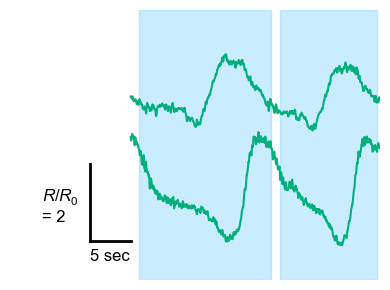

In [12]:
#Fig S1D
neuron1_data=pd.read_csv('../data/Fig1_S1_S2/FigS2D_data/20240218172630_neuron_1.csv')
neuron2_data=pd.read_csv('../data/Fig1_S1_S2/FigS2D_data/20240218172630_neuron_2.csv')
#the time stamp at the start of backwardcrawling
plot_initial_time=13+neuron1_data['time_s'][0]  #sec
#load forward crawling_timimngs
backward_timings=pd.read_excel('../data/Fig1_S1_S2/FigS2D_data/backward_crawl_init_end.xlsx')
#backward crawling plot
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(1, 1, 1)

plt.plot(neuron1_data['time_s'][neuron1_data['time_s']>plot_initial_time]-plot_initial_time, 
         neuron1_data['ratio_div_baseline'][neuron1_data['time_s']>plot_initial_time]+3, label='neuron 1',c=(3/255,175/255,122/255))
plt.plot(neuron2_data['time_s'][neuron2_data['time_s']>plot_initial_time]-plot_initial_time, 
         neuron2_data['ratio_div_baseline'][neuron2_data['time_s']>plot_initial_time], label='neuron 2', c=(3/255,175/255,122/255))
plt.xlim(-15,31)
plt.ylim(0,7)

for crawl_id in range(2):
    plt.axvspan(backward_timings['initial'][crawl_id]+neuron1_data['time_s'][0]-plot_initial_time, 
                backward_timings['end'][crawl_id]+neuron1_data['time_s'][0]-plot_initial_time, color=(77/255,196/255,255/255), alpha=0.3)
plt.xlabel('time (sec)', fontsize=14)
plt.ylabel('$\Delta R/R$', fontsize=14)

plt.plot([-5,-5,0,0],[1,1,1,1], c='k', lw=2)
plt.plot([-5,-5,-5,-5],[1,1,3,3], c='k', lw=2)
plt.text(-5, 0.5, '5 sec', fontsize=12)
plt.text(-11, 1.5, '$R/R_{0}$\n= 2', fontsize=12)

ax.axis("off")
plt.tight_layout()
plt.savefig('figures/FigS2D.svg')

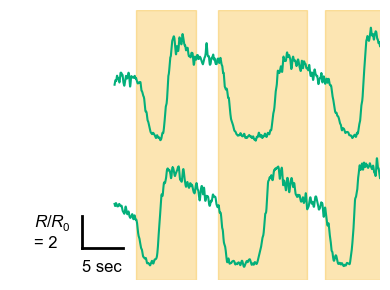

In [13]:
#Fig S1D
neuron1_data=pd.read_csv('../data/Fig1_S1_S2/FigS2F_data/20231110173234_neuron_1.csv')
neuron2_data=pd.read_csv('../data/Fig1_S1_S2/FigS2F_data/20231110173234_neuron_2.csv')
#the time stamp at the start of forward crawling
plot_initial_time=63+neuron1_data['time_s'][0]  #sec
#load forward crawling_timimngs
forward_timings=pd.read_excel('../data/Fig1_S1_S2/FigS2F_data/forward_crawl_init_end.xlsx')

#backward crawling plot
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(1, 1, 1)

plt.plot(neuron1_data['time_s'][neuron1_data['time_s']>plot_initial_time]-plot_initial_time, 
         neuron1_data['ratio_div_baseline'][neuron1_data['time_s']>plot_initial_time]+8, label='neuron 1',c=(3/255,175/255,122/255))
plt.plot(neuron2_data['time_s'][neuron2_data['time_s']>plot_initial_time]-plot_initial_time, 
         neuron2_data['ratio_div_baseline'][neuron2_data['time_s']>plot_initial_time], label='neuron 2', c=(3/255,175/255,122/255))
plt.xlim(-13,33)
plt.ylim(0,17)

for crawl_id in range(3):
    plt.axvspan(forward_timings['initial'][crawl_id]+neuron1_data['time_s'][0]-plot_initial_time, 
                forward_timings['end'][crawl_id]+neuron1_data['time_s'][0]-plot_initial_time, color=(246/255,170/255,0/255), alpha=0.3)
plt.xlabel('time (sec)', fontsize=14)
plt.ylabel('$\Delta R/R$', fontsize=14)

plt.plot([-4,-4,1,1],[2,2,2,2], c='k', lw=2)
plt.plot([-4,-4,-4,-4],[2,2,4,4], c='k', lw=2)
plt.text(-4, 0.5, '5 sec', fontsize=12)
plt.text(-10, 2,'$R/R_{0}$\n= 2', fontsize=12)
ax.axis("off")
plt.tight_layout()
plt.savefig('figures/FigS2F.svg')